In [117]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install wordcloud
#!pip install folium

In [6]:
def get_requests(url):
    r = requests.get(url)
    print(r)
    return r

In [7]:

def save_name(name , r): 
    with open(name,'w') as file:
        json.dump(r.json(), file)
        
        

In [8]:
def Load_File(name):
    with open(name) as file:
        data = json.load(file)
        return data
    

In [9]:
url = 'https://api.publicapis.org/entries'
r1 = get_requests(url)

<Response [200]>


In [10]:
save_name('entries',r1)

In [11]:
data1 = Load_File('entries')

In [12]:
df1 = pd.DataFrame(data1)
df1

,count,entries
0,940,"{'API': 'Axolotl', 'Description': 'Collection ..."
1,940,"{'API': 'Cat Facts', 'Description': 'Daily cat..."
2,940,"{'API': 'Cataas', 'Description': 'Cat as a ser..."
3,940,"{'API': 'catAPI', 'Description': 'Random pictu..."
4,940,"{'API': 'Cats', 'Description': 'Pictures of ca..."
...,...,...
935,940,"{'API': 'Troposphere', 'Description': 'Global ..."
936,940,"{'API': 'Visual Crossing', 'Description': 'Glo..."
937,940,"{'API': 'weather-api', 'Description': 'A RESTf..."
938,940,"{'API': 'Weatherbit', 'Description': 'Weather'..."


In [13]:
df1 = df1['entries'].apply(pd.Series)
df1
#df1 = pd.DataFrame(data1['entries'])
#apply entries to main

,API,Description,Auth,HTTPS,Cors,Link,Category
0,Axolotl,Collection of axolotl pictures and facts,,True,unknown,https://theaxolotlapi.netlify.app/,Animals
1,Cat Facts,Daily cat facts,,True,no,https://alexwohlbruck.github.io/cat-facts/,Animals
2,Cataas,Cat as a service (cats pictures and gifs),,True,unknown,https://cataas.com/,Animals
3,catAPI,Random pictures of cats,,True,yes,https://github.com/ThatCopy/catAPI/wiki/Usage,Animals
4,Cats,Pictures of cats from Tumblr,apiKey,True,unknown,https://docs.thecatapi.com/,Animals
...,...,...,...,...,...,...,...
935,Troposphere,Global weather and climate data,apiKey,True,yes,https://www.troposphere.io/developer,Weather
936,Visual Crossing,Global historical and weather forecast data,apiKey,True,yes,https://www.visualcrossing.com/weather-api,Weather
937,weather-api,A RESTful free API to check the weather,,True,no,https://github.com/robertoduessmann/weather-api,Weather
938,Weatherbit,Weather,apiKey,True,unknown,https://www.weatherbit.io/api,Weather


In [14]:
df1.dtypes

API            object
Description    object
Auth           object
HTTPS            bool
Cors           object
Link           object
Category       object
dtype: object

In [15]:
df1.info

<bound method DataFrame.info of                  API                                        Description  \
0            Axolotl           Collection of axolotl pictures and facts   
1          Cat Facts                                    Daily cat facts   
2             Cataas          Cat as a service (cats pictures and gifs)   
3             catAPI                            Random pictures of cats   
4               Cats                       Pictures of cats from Tumblr   
..               ...                                                ...   
935      Troposphere                    Global weather and climate data   
936  Visual Crossing        Global historical and weather forecast data   
937      weather-api            A RESTful free API to check the weather   
938       Weatherbit                                            Weather   
939             wttr  :partly_sunny: The right way to check the weather   

       Auth  HTTPS     Cors                                        

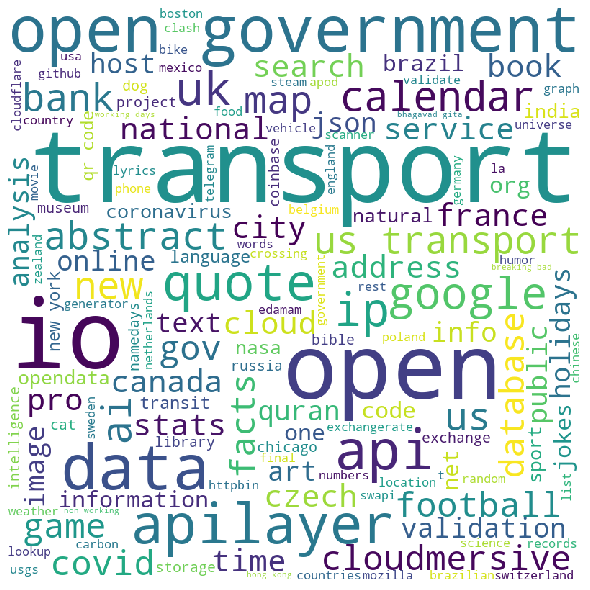

In [16]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
 
for val in df1['API']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


In [17]:
url2 = 'https://api.coindesk.com/v1/bpi/currentprice.json'
r2 = get_requests(url2)

<Response [200]>


In [18]:
save_name("Coindesk",r2)

In [19]:
data2 = Load_File('Coindesk')

In [20]:
df2 = pd.DataFrame(data2)

In [21]:
df2

,time,disclaimer,chartName,bpi
updated,"Sep 22, 2021 15:21:00 UTC",This data was produced from the CoinDesk Bitco...,Bitcoin,NaN
updatedISO,2021-09-22T15:21:00+00:00,This data was produced from the CoinDesk Bitco...,Bitcoin,NaN
updateduk,"Sep 22, 2021 at 16:21 BST",This data was produced from the CoinDesk Bitco...,Bitcoin,NaN
USD,NaN,This data was produced from the CoinDesk Bitco...,Bitcoin,"{'code': 'USD', 'symbol': '&#36;', 'rate': '42..."
GBP,NaN,This data was produced from the CoinDesk Bitco...,Bitcoin,"{'code': 'GBP', 'symbol': '&pound;', 'rate': '..."
EUR,NaN,This data was produced from the CoinDesk Bitco...,Bitcoin,"{'code': 'EUR', 'symbol': '&euro;', 'rate': '3..."


In [22]:
df2.dtypes

time          object
disclaimer    object
chartName     object
bpi           object
dtype: object

In [23]:
df2.describe

<bound method NDFrame.describe of                                  time  \
updated     Sep 22, 2021 15:21:00 UTC   
updatedISO  2021-09-22T15:21:00+00:00   
updateduk   Sep 22, 2021 at 16:21 BST   
USD                               NaN   
GBP                               NaN   
EUR                               NaN   

                                                   disclaimer chartName  \
updated     This data was produced from the CoinDesk Bitco...   Bitcoin   
updatedISO  This data was produced from the CoinDesk Bitco...   Bitcoin   
updateduk   This data was produced from the CoinDesk Bitco...   Bitcoin   
USD         This data was produced from the CoinDesk Bitco...   Bitcoin   
GBP         This data was produced from the CoinDesk Bitco...   Bitcoin   
EUR         This data was produced from the CoinDesk Bitco...   Bitcoin   

                                                          bpi  
updated                                                   NaN  
updatedISO              

In [24]:
df2.isnull().count()

time          6
disclaimer    6
chartName     6
bpi           6
dtype: int64

In [25]:
a = pd.DataFrame(data2['bpi'])
a

,USD,GBP,EUR
code,USD,GBP,EUR
symbol,&#36;,&pound;,&euro;
rate,"42,513.0465","31,158.9171","36,227.0249"
description,United States Dollar,British Pound Sterling,Euro
rate_float,42513,31158.9,36227


In [26]:
a = a.transpose()

In [27]:
a

,code,symbol,rate,description,rate_float
USD,USD,&#36;,"42,513.0465",United States Dollar,42513
GBP,GBP,&pound;,"31,158.9171",British Pound Sterling,31158.9
EUR,EUR,&euro;,"36,227.0249",Euro,36227


In [28]:
df2 = df2.drop("bpi",axis = 1)


In [29]:

df2 = df2.drop(["updated","updatedISO","updateduk"],axis = 0)

In [30]:
df2

,time,disclaimer,chartName
USD,NaN,This data was produced from the CoinDesk Bitco...,Bitcoin
GBP,NaN,This data was produced from the CoinDesk Bitco...,Bitcoin
EUR,NaN,This data was produced from the CoinDesk Bitco...,Bitcoin


In [31]:
frames = [df2,a]
df2 = pd.concat(frames,axis = 1)
df2

,time,disclaimer,chartName,code,symbol,rate,description,rate_float
USD,NaN,This data was produced from the CoinDesk Bitco...,Bitcoin,USD,&#36;,"42,513.0465",United States Dollar,42513
GBP,NaN,This data was produced from the CoinDesk Bitco...,Bitcoin,GBP,&pound;,"31,158.9171",British Pound Sterling,31158.9
EUR,NaN,This data was produced from the CoinDesk Bitco...,Bitcoin,EUR,&euro;,"36,227.0249",Euro,36227


In [32]:
df2 = df2.drop(['time'],axis = 1)

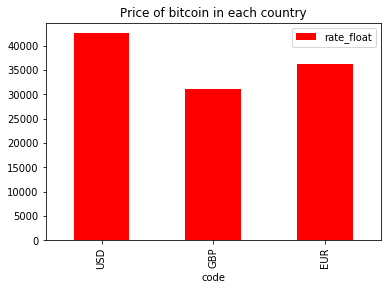

In [70]:
df2.plot(kind='bar',x='code',y='rate_float',color = 'red' , title = 'Price of bitcoin in each country' , )

In [34]:
url3 = 'https://api.nationalize.io/?name=nathaniel'
r3 = get_requests(url3)

<Response [200]>


In [35]:
save_name("national",r3)

In [36]:
data3 = Load_File('national')

In [48]:
df3.dtypes

country_id      object
probability    float64
dtype: object

In [43]:
df3 = pd.DataFrame(data3['country'])
df3

,country_id,probability
0,GH,0.330649
1,US,0.214659
2,PH,0.165708


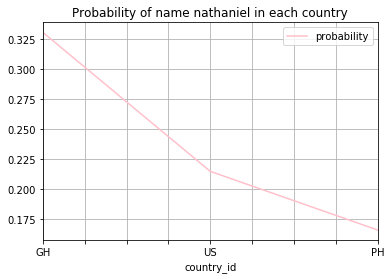

In [68]:
df3.plot(kind='line',x='country_id',y='probability',color = 'pink', title = 'Probability of name nathaniel in each country' , grid = True)

In [37]:
url4 = 'https://datausa.io/api/data?drilldowns=Nation&measures=Population'
r4 = get_requests(url4)

<Response [200]>


In [38]:
save_name("dataUSA",r4)

In [39]:
data4 = Load_File('dataUSA')

In [86]:
df4 = pd.DataFrame(data4['data'])
df4

,ID Nation,Nation,ID Year,Year,Population,Slug Nation
0,01000US,United States,2019,2019,328239523,united-states
1,01000US,United States,2018,2018,327167439,united-states
2,01000US,United States,2017,2017,325719178,united-states
3,01000US,United States,2016,2016,323127515,united-states
4,01000US,United States,2015,2015,321418821,united-states
5,01000US,United States,2014,2014,318857056,united-states
6,01000US,United States,2013,2013,316128839,united-states


In [87]:
df4 = df4.drop("ID Year",axis = 1)
df4

,ID Nation,Nation,Year,Population,Slug Nation
0,01000US,United States,2019,328239523,united-states
1,01000US,United States,2018,327167439,united-states
2,01000US,United States,2017,325719178,united-states
3,01000US,United States,2016,323127515,united-states
4,01000US,United States,2015,321418821,united-states
5,01000US,United States,2014,318857056,united-states
6,01000US,United States,2013,316128839,united-states


In [88]:
df4 = df4.reindex(df4.index[::-1])

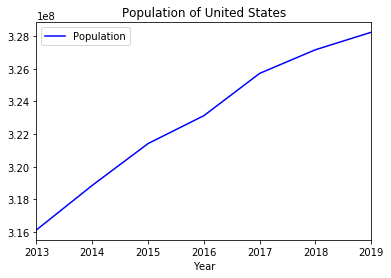

In [93]:
df4.plot(kind='line',x='Year',y='Population',color = 'blue', title = 'Population of United States' )

In [94]:
url5 = 'https://ipinfo.io/161.185.160.93/geo'
r5 = get_requests(url5)

<Response [200]>


In [95]:
save_name("ipinfo",r5)

In [96]:
data5 = Load_File('ipinfo')

In [98]:
data5

{'ip': '161.185.160.93',
 'city': 'New York City',
 'region': 'New York',
 'country': 'US',
 'loc': '40.7143,-74.0060',
 'org': 'AS22252 The City of New York',
 'postal': '10004',
 'timezone': 'America/New_York',
 'readme': 'https://ipinfo.io/missingauth'}

In [100]:
df5 = pd.DataFrame(data5, index=[0])

In [105]:
df5

,ip,city,region,country,loc,org,postal,timezone,readme
0,161.185.160.93,New York City,New York,US,"40.7143,-74.0060",AS22252 The City of New York,10004,America/New_York,https://ipinfo.io/missingauth


In [106]:
df5.dtypes

ip          object
city        object
region      object
country     object
loc         object
org         object
postal      object
timezone    object
readme      object
dtype: object

In [112]:
df5[['latitude','longtitude']] = df5['loc'].str.split(",",expand=True,)
df5

,ip,city,region,country,loc,org,postal,timezone,readme,latitude,longtitude
0,161.185.160.93,New York City,New York,US,"40.7143,-74.0060",AS22252 The City of New York,10004,America/New_York,https://ipinfo.io/missingauth,40.7143,-74.0060


In [119]:
import folium

visual5 = folium.Map(
    location=[df5.latitude, df5.longtitude],
    zoom_start=10,
)

folium.Marker(
    location=[df5.latitude, df5.longtitude],
    popup=df5.city,
    icon=folium.Icon(icon='cloud')
).add_to(visual5)

visual5